In [93]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

In [94]:
df=pd.read_csv("e:/presentation2.csv")

In [95]:

x = df.iloc[:,0:24]
y=df.iloc[:,-1]

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x = lda.fit_transform(x, y)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [97]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(10, 4), random_state=1)

print(clf.fit(x,y)) 

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.70)

In [99]:
y_pred=clf.predict(x_test)
y_pred

array([3, 1, 4, 3, 4, 3, 3, 2, 4, 1, 1, 4, 4, 1, 3, 2, 3, 4], dtype=int64)

In [100]:
from sklearn.metrics import accuracy_score
print("accuracy is:{0:.2f}%".format(accuracy_score(y_test,y_pred)*100))


accuracy is:94.44%


In [101]:
clf.score(x_test,y_test)

0.9444444444444444

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9444444444444444

In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6

   micro avg       0.94      0.94      0.94        18
   macro avg       0.94      0.92      0.91        18
weighted avg       0.96      0.94      0.94        18



In [104]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

Accuracy of MLPClassifier : ''  0.9444444444444444


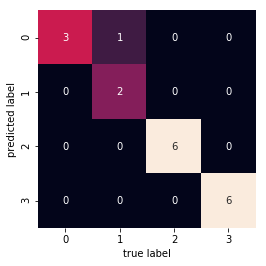

In [105]:
#cm=confusion_matrix(y_test,y_pred)
#cm
from sklearn.metrics import confusion_matrix
import seaborn as sns
#plt.figure(figsize=(10,7))
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
print("Accuracy of MLPClassifier : '' ", accuracy(mat))

In [106]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x, y, cv=5)# cv=no of splits


print("Accuracy(using Cross validation): %.2f%%" % (scores.mean()*100.0)) 

Accuracy(using Cross validation): 88.81%


In [107]:
scores

array([0.85714286, 0.83333333, 0.75      , 1.        , 1.        ])